-  REGRESION LINEAR Python Sklearn  - 
    MULTI VARIABLES
    
    Formula de Regresion Linear con multiplas variables : Y = m1X1 + m2X2, + m3X3....mnXn + C 
                                                         
                                                     donde X1, X2, X3 son las variables que vamos a elegir
                                                      y m1, m2, m3 son los parametros Slope de cada variable que calcularemos 
                                                      y c es el valor intercept 
    
     Y = variable dependiente (columna: Price_new)
     X =  multi variables independientes (columnas: Number of Reviews, Bedrooms_new, Bathrooms_new) 

In [1]:
import pandas as pd

#Import data set
df = pd.read_csv(r"C:\Users\Jo\Desktop\Data Analytics\data analytics\Glovo_bootcamp\Proyecto Final\Proyecto_Final\df_madridfinal.csv", sep=",")
df.head()

,Unnamed: 0,ID,Listing Url,Name,Description,Host ID,Host Since,Host Response Rate,Host Total Listings Count,Host Verifications,...,Calculated host listings count,Geolocation,Price_new,Price_new_weekly,Price_new_monthly,Beds_new,Bedrooms_new,Bathrooms_new,Is Super Host,Is Super Host YES/NO
0,0,15141125,https://www.airbnb.com/rooms/15141125,Panoramic charming studio!,"Charming bright and cosy studio in ""El Rastro""...",96019257,2016-09-20,100.0,2.0,"email,phone,facebook,reviews,jumio,government_id",...,2.0,"40.40745268477803, -3.7079954754432634",50.0,350.0,1500.0,1.0,0.0,1.0,True,Yes
1,1,9470166,https://www.airbnb.com/rooms/9470166,Comfortable penthouse in the center,"In the center, recently remodeled, comfortable...",9885245,2013-11-08,100.0,13.0,"email,phone,reviews,jumio",...,13.0,"40.40831556101927, -3.705006385704201",50.0,350.0,1500.0,2.0,1.0,1.0,False,No
2,2,17444981,https://www.airbnb.com/rooms/17444981,Cosy Apartment SOL/LA LATINA,Nice apartment near Sol and La Latina. Perfect...,118059488,2017-02-25,100.0,1.0,"email,phone,facebook,reviews,jumio,offline_gov...",...,1.0,"40.413722014584295, -3.7068231186536718",77.0,539.0,2310.0,2.0,1.0,1.5,False,No
3,3,3284565,https://www.airbnb.com/rooms/3284565,Alquiler Estudio Nuevo Madrid,"Alquilo estudio en el centro de Madrid , total...",1892467,2012-03-09,100.0,3.0,"email,phone,reviews,jumio,government_id",...,3.0,"40.411263372718054, -3.6973054373712886",50.0,300.0,740.0,2.0,1.0,1.0,False,No
4,4,499911,https://www.airbnb.com/rooms/499911,2 bedroom apartment downtown Madrid,Bright and airy apartment in Central Madrid re...,2467212,2012-05-26,100.0,1.0,"email,phone,facebook,reviews,jumio",...,1.0,"40.41255625665078, -3.701155364799422",95.0,590.0,2850.0,4.0,2.0,1.0,True,Yes


In [2]:
#Creamos un dataset con solo las columnas que nos sirven para hacer la regresion linear
prueba_rlm = df[['Number of Reviews', 'Bedrooms_new', 'Bathrooms_new', 'Price_new']]

prueba_rlm

,Number of Reviews,Bedrooms_new,Bathrooms_new,Price_new
0,30,0.0,1.0,50.0
1,97,1.0,1.0,50.0
2,7,1.0,1.5,77.0
3,6,1.0,1.0,50.0
4,72,2.0,1.0,95.0
...,...,...,...,...
12763,11,1.0,1.0,80.0
12764,85,1.0,1.0,80.0
12765,1,1.0,2.0,50.0
12766,122,1.0,1.0,70.0


In [3]:
# Definimos el dataset de X con solo las columnas que nos sirven y excluyendo 'Price_new' que sera' la variable Y

X = prueba_rlm.drop(columns = 'Price_new')

X

,Number of Reviews,Bedrooms_new,Bathrooms_new
0,30,0.0,1.0
1,97,1.0,1.0
2,7,1.0,1.5
3,6,1.0,1.0
4,72,2.0,1.0
...,...,...,...
12763,11,1.0,1.0
12764,85,1.0,1.0
12765,1,1.0,2.0
12766,122,1.0,1.0


In [4]:
# Definimos el dataset de Y osea la columna Price_new

y = prueba_rlm['Price_new']

y

0        50.0
1        50.0
2        77.0
3        50.0
4        95.0
         ... 
12763    80.0
12764    80.0
12765    50.0
12766    70.0
12767    89.0
Name: Price_new, Length: 12768, dtype: float64

In [5]:
# Dividimos el dataset en df de training y df de testing 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 0)


In [6]:
# Vamos a usar la funcion Linear Regression de la libreria sklearn.linear_model

from sklearn.linear_model import LinearRegression

# Ponemos la funcion LinearRegression en una variable llamada lr 

lr = LinearRegression()

In [7]:
# Ejecutamos el fitting de los datos X_train y y_train 

lr.fit(X_train, y_train)

LinearRegression()

In [8]:
# Calcular valor c (interception)

c= lr.intercept_

c

9.251112220985846

In [9]:
# Calcular valor m (coefficient / slope of the regression line)

m= lr.coef_ 

m

array([-1.38276317e-02,  3.11045957e+01,  1.33883455e+01])

In [12]:
# En la libreria sklearn usamos la funcion predict() para hacer la prediccion de la variable Y, osea Price_New

y_pred_train = lr.predict(X_train)

y_pred_train

array([84.82099387, 53.74405342, 53.24625868, ..., 53.73022579,
       98.08489067, 84.84864913])

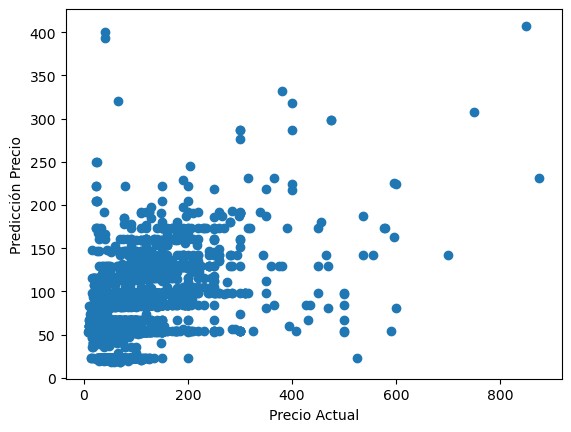

In [13]:
# Hacemos el grafico scatter  

import matplotlib.pyplot as plt

plt.scatter(y_train, y_pred_train)
plt.xlabel('Precio Actual')
plt.ylabel('Predicción Precio')
plt.show()


In [14]:
# Para verificar si las predicciones son correctas usamos una libreria de sklearn, sklearn.metrics y la function r2_score()

from sklearn.metrics import r2_score

r2_score(y_train, y_pred_train)


0.29125478341929467

El output de la function r2_score nos indica cuanto los datos se conforman con la linea de regresion calculada.
 
Es el coeficiente de determinación, también denominado puntuación R2, y se utiliza para evaluar el rendimiento de un modelo de regresión lineal. Es la cantidad de variación en la variable dependiente de salida que se puede predecir a partir de la(s) variable(s) independiente(s) de entrada.  

Osea cuantas variacion tenemos en las predicciones de precios (Price_new = variable dependiente) a partir de las variables independientes (Number of Reviews, Bedrooms_new, Bathrooms_new)  

Un valor más alto de R2 es deseable, ya que indica mejores resultados.

En este caso tenemos 0.29 entonces el resultado del model es imperfecto. 

Conclusiones:

La mejor puntuación posible es 1, que se obtiene cuando los valores predichos coinciden con los valores reales.
La puntuación R2 del modelo de referencia (baseline)  es 0.
En los peores casos, la puntuación R2 puede ser incluso negativa.
 